# Working with a hand radiograph. 

Hand radiograph are obtained from [2017 Radiological Society of North America competition](http://rsnachallenges.cloudapp.net/competitions/4). 

X-ray intensities are high in dense tissue such as bone. Such images can be used to predict "bone age " in children.

### Loading images

In [44]:
import imageio
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as ndi  # 
import matplotlib.style as style
style.use('fivethirtyeight')


im = imageio.imread('Data/hand.png')

print('Data type:', im.dtype)
print('Min. value:', im.min())
print('Max value:', im.max())

Data type: uint8
Min. value: 3
Max value: 224


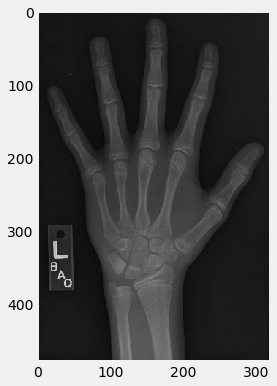

In [45]:
# normalize luminance data using vmin and vmax. 
plt.figure(figsize=(6,6))
plt.imshow(im, vmin=0, vmax=255, cmap='gray')
plt.grid()

### Visualizing distribution of values

The distribution of values can be visualized using a histogram. The frequency with which a given range of pixel intensies occur is derived using the CDF (cumulative distribution function)

The 'intensity distribution' is thus discribed using the histogram and CDF


The CDF is simply calculated by,

- First: finding the cumulative sum of `hist()`,
- then dividing by the total number of pixels in `hist()`.

Text(0.5,1,'CDF')

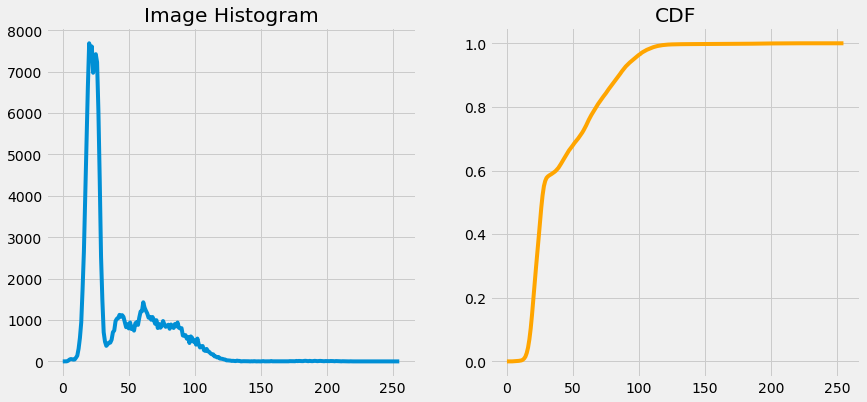

In [46]:
# Create a histogram, binned at each possible value

# Generates a 256-bin histogram of image which covers the full range of np.uint8 values.
hist = ndi.histogram(im, min=0, max=255, bins=256)

# Create a cumulative distribution function
cdf = hist.cumsum() / hist.sum()

# Plot the histogram and CDF
fig, ax = plt.subplots(1, 2, sharex=True, figsize=(13,6))
ax[0].plot(hist, label='Histogram')
ax[0].set_title('Image Histogram')
ax[1].plot(cdf, label='CDF', color='orange')
ax[1].set_title('CDF')

## Image Masks


We can restrict the analysis to only the most important part of an image by creating and applying something called as "Image Masks"


A Mast is a boolean array which serves as a screen to remove undesirable pixels. A mask should retain the same dimension as the original image so that the two (the original image and the mask) can be overlayed upon eash other. 

A Mask can be created is by finding all "pixels" in an image that satisfy a certain condition. 

For example in the above Hand histogram we can see that the values tend to drop around 35. So we can create a mask for all the pixel intensities above this. 

(-0.5, 319.5, 479.5, -0.5)

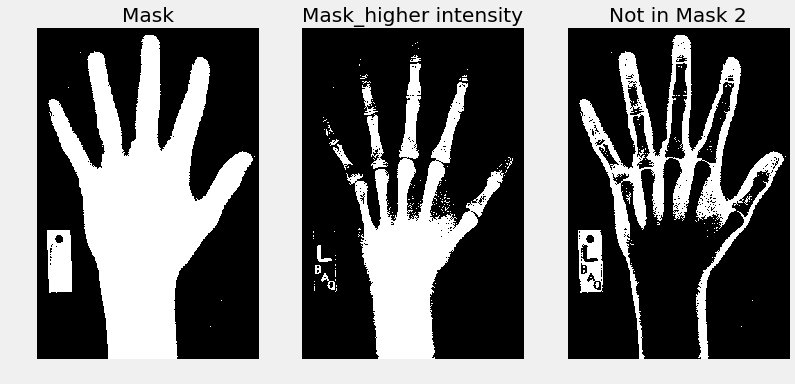

In [47]:
mask_1 = im > 35
mask_2 = im > 64

mask_3 = mask_1 & ~mask_2

fig, ax = plt.subplots(1, 3, sharex=True, figsize=(12,6))
ax[0].imshow(mask_1, cmap='gray')
ax[1].imshow(mask_2, cmap='gray')
ax[2].imshow(mask_3, cmap='gray')
ax[0].set_title(label='Mask')
ax[1].set_title(label= 'Mask_higher intensity')
ax[2].set_title(label = 'Not in Mask 2')
ax[0].axis('off')
ax[1].axis('off')
ax[2].axis('off')

- This does a decent job masking out the original image. 

- We can also see that increasing the threshold to 64, creates a 'bone mask'. 

- Finally a mask of non-bone tissue, by finding pixels that are in mask1 but not in mask2. The selected pixels seems to be more   part of the skin than of the bone. 

#### Alternative

Although masks are binary, they can be applied to images to filter out pixels where the mask is False. This is simply done using NumPy's `where()` function.

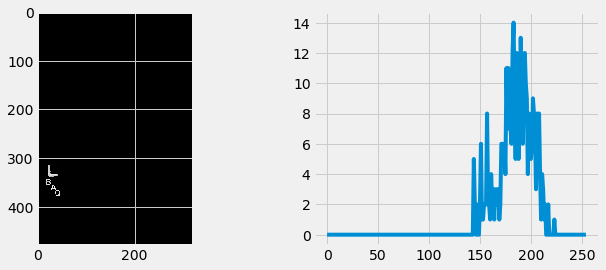

In [59]:
# Screen out non-bone pixels from "im"
mask_bone = im >= 145
im_bone = np.where(mask_bone, im, 0)

# Get the histogram of bone intensities
hist = ndi.histogram(im_bone, min=1, max=255, bins=255)

# Plot masked image and histogram
fig, ax = plt.subplots(1,2, figsize=(10,4))
ax[0].imshow(im_bone, cmap='gray')
ax[1].plot(hist)

In [60]:
im

Image([[17, 17, 20, ..., 34, 36, 36],
       [18, 19, 19, ..., 29, 30, 32],
       [20, 20, 18, ..., 29, 31, 29],
       ...,
       [20, 22, 18, ...,  7,  6, 15],
       [16, 17, 17, ...,  8,  6, 12],
       [26, 14, 17, ...,  6,  5,  8]], dtype=uint8)

## Binary dilation

## Tuning masks

An opposite implementation is the *binary erosion*, which can be implemented in a same manner. 